# Caligraphomate - Tracés vactoriel

## Setup

In [20]:
import time
import freetype
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

## Simulation tracé traits

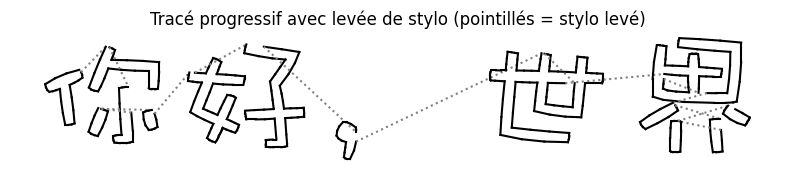

In [21]:
text = "你好，世界"
font_path = "../fonts/Wawati_SC.otf"

face = freetype.Face(font_path)
face.set_char_size(64 * 64)

pen_x = 0
all_paths = []

# construction des contours avec position absolue
for char in text:
    face.load_char(char, freetype.FT_LOAD_NO_BITMAP)
    slot = face.glyph
    outline = slot.outline

    points = outline.points
    contours = outline.contours
    start = 0

    offset_x = pen_x
    offset_y = slot.metrics.horiBearingY /64

    for contour_end in contours:
        contour = points[start:contour_end + 1]
        contour = [(x + offset_x, offset_y + y) for (x, y) in contour]
        all_paths.append(contour)
        start = contour_end + 1

    pen_x += slot.advance.x 

# tracé progressif sur une seule figure
plt.ion()
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("Tracé progressif avec levée de stylo (pointillés = stylo levé)")

current_pos = None

for contour in all_paths:
    xs, ys = zip(*contour)

    # Déplacement à vide (stylo levé) si nécessaire
    if current_pos is not None:
        x0, y0 = current_pos
        x1, y1 = xs[0], ys[0]
        ax.plot([x0, x1], [y0, y1], linestyle='dotted', color='gray')
        fig.canvas.flush_events()
        time.sleep(0.01)

    # Tracé du contour (stylo abaissé)
    for i in range(len(xs) - 1):
        ax.plot([xs[i], xs[i + 1]], [ys[i], ys[i + 1]], color='black')
        fig.canvas.flush_events()
        time.sleep(0.01)

    current_pos = (xs[-1], ys[-1])

plt.ioff()
plt.show()
